# 特征工程🃏

&emsp;&emsp;特征工程，是指用一系列工程化的方式从原始数据中筛选出更好的数据特征，以提升模型的训练效果。业内有一句广为流传的话是：数据和特征决定了机器学习的上限，而模型和算法是在逼近这个上限而已。由此可见，好的数据和特征是模型和算法发挥更大的作用的前提。特征工程通常包括数据预处理、特征选择、降维等环节。如下图所示：
![1](特征工程.png)

## 0️⃣ 前言

&emsp;&emsp;我们经常在处理数据时，会面临以下问题：
- 收集的数据格式不对（如 `SQL` 数据库、`JSON`、`CSV` 等）
- 缺失值和异常值
- 标准化
- 减少数据集中存在的固有噪声（部分存储数据可能已损坏）
- 数据集中的某些功能可能无法收集任何信息以供分析

而减少统计分析期间要使用的特征的数量可能会带来一些好处，例如：
- 提高精度
- 降低过拟合风险
- 加快训练速度
- 改进数据可视化
- 增加我们模型的可解释性

事实上，统计上证明，当执行机器学习任务时，存在针对每个特定任务应该使用的**最佳数量的特征**（图 1）。如果添加的特征比必要的特征**多**，那么我们的模型性能将**下降**（因为添加了噪声）。真正的挑战是找出哪些特征是**最佳的使用特征**（这实际上取决于我们提供的数据量和我们正在努力实现的任务的复杂性）。这就是特征选择技术能够帮到我们的地方！

<img float="center" src=1_ZuFOzQawXnw_CUnVpRDLgA.png >

## 0️⃣.1️⃣ 赛题重述
    
&emsp;&emsp;这是一道来自于天池的新手练习题目，用`数据分析`、`机器学习`等手段进行 [二手车售卖价格预测](https://tianchi.aliyun.com/competition/entrance/231784/information) 的回归问题。赛题本身的思路清晰明了，即对给定的数据集进行分析探讨，然后设计模型运用数据进行训练，测试模型，最终给出选手的预测结果。前面我们已经进行过EDA分析在这里[天池_二手车价格预测_Task1-2_赛题理解与数据分析
](https://blog.csdn.net/ExcaliburUlimited/article/details/105021630)

## 0️⃣.2️⃣ 数据集概述
&emsp;&emsp;赛题官方给出了来自Ebay Kleinanzeigen的二手车交易记录，总数据量超过**40w**，包含**31列**变量信息，其中**15列**为匿名变量，即`v0`至`v15`。并从中抽取**15万条**作为训练集，**5万**条作为测试集A，**5万**条作为测试集B，同时对`name`、`model`、`brand`和`regionCode`等信息进行脱敏。具体的数据表如下图：

<div class="table-wrapper" style = "center"><table style = "center">
<thead>
<tr style = "center">
<th><strong>Field</strong></th>
<th><strong>Description</strong></th>
</tr>
</thead>
<tbody style = "center">
<tr style = "center">
<td >SaleID</td>
<td>交易ID，唯一编码</td>
</tr>
<tr>
<td>name</td>
<td>汽车交易名称，已脱敏</td>
</tr>
<tr>
<td>regDate</td>
<td>汽车注册日期，例如20160101，2016年01月01日</td>
</tr>
<tr>
<td>model</td>
<td>车型编码，已脱敏</td>
</tr>
<tr>
<td>brand</td>
<td>汽车品牌，已脱敏</td>
</tr>
<tr>
<td>bodyType</td>
<td>车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7</td>
</tr>
<tr>
<td>fuelType</td>
<td>燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6</td>
</tr>
<tr>
<td>gearbox</td>
<td>变速箱：手动：0，自动：1</td>
</tr>
<tr>
<td>power</td>
<td>发动机功率：范围 [ 0,  600 ]</td>
</tr>
<tr>
<td>kilometer</td>
<td>汽车已行驶公里，单位万km</td>
</tr>
<tr>
<td>notRepairedDamage</td>
<td>汽车有尚未修复的损坏：是：0，否：1</td>
</tr>
<tr>
<td>regionCode</td>
<td>地区编码，已脱敏</td>
</tr>
<tr>
<td>seller</td>
<td>销售方：个体：0，非个体：1</td>
</tr>
<tr>
<td>offerType</td>
<td>报价类型：提供：0，请求：1</td>
</tr>
<tr>
<td>creatDate</td>
<td>汽车上线时间，即开始售卖时间</td>
</tr>
<tr>
<td>price</td>
<td>二手车交易价格（预测目标）</td>
</tr>
<tr>
<td>v系列特征</td>
<td>匿名特征，包含v0-14在内15个匿名特征</td>
</tr>
</tbody>
</table>
</div>

## 1️⃣ 异常缺失值删除
### 1️⃣.1️⃣  导入库与数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline

In [2]:
train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
print(train.shape)
print(test.shape)

(150000, 31)
(50000, 30)


In [3]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

### 1️⃣.2️⃣  异常值删除
&emsp;&emsp;这里可以将箱型图中的超过上下限的那些值作为异常值删除。如下图所示，箱型图中间是一个箱体，也就是粉红色部分，箱体左边，中间，右边分别有一条线，左边是下分位数($Q1$)，右边是上四分位数($Q3$)，中间是中位数($Median$)，上下四分位数之差是四分位距$IQR（Interquartile Range）$，用$Q1-1.5*IQR$得到下边缘（最小值），$Q3+1.5*IQR$得到上边缘（最大值）。在上边缘之外的数据就是极大异常值，在下边缘之外的数据就是极小异常值。
![](../img/微信截图_20200331224645.png)

搞清楚原理那我们就构造一个实现上述功能的函数吧！

In [5]:
def drop_outliers(data, col_name, scale = 1.5):
    """
    用于清洗异常值，默认用 box_plot（scale=1.5）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """
    data_n = data.copy()
    data_series = data_n[col_name]
    
    IQR = scale * (data_series.quantile(0.75) - data_series.quantile(0.25)) # quantile是pd内置的求四分位的函数
    val_low = data_series.quantile(0.25) - IQR # 下边缘
    val_up = data_series.quantile(0.75) + IQR # 上边缘
    rule_low = (data_series < val_low) # 下边缘的极小异常值的下标列表
    rule_up = (data_series > val_up)   # 上边缘的极大异常值的下标列表
    
    index = np.arange(data_series.shape[0])[rule_low | rule_up] # | 运算就是说只要rule_low和rule_up中只要有一个值为True，就把这个下标取出来
    print(index)
    print("Delete number is: {}".format(len(index)))
    
    data_n = data_n.drop(index) # 删除index对应下标的元素
    data_n.reset_index(drop=True, inplace=True) #下文有介绍
    print("Now column number is: {}".format(data_n.shape[0]))
    
    index_low = np.arange(data_series.shape[0])[rule_low] # 下边缘的异常数据的描述统计量
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    
    index_up = np.arange(data_series.shape[0])[rule_up] # 上边缘的异常数据的描述统计量
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize = (10, 7))
    sns.boxplot(y = data[col_name], data = data, palette = "Set1", ax = ax[0])
    sns.boxplot(y = data_n[col_name], data = data_n, palette = "Set1", ax = ax[1])
    return data_n

这里`reset_index`可以还原索引，重新变为默认的整型索引 

`DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill=”)`

- `level`：`int`、`str`、`tuple`或`list`，默认无，仅从索引中删除给定级别。默认情况下移除所有级别。控制了具体要还原的那个等级的索引
- `drop`：`drop`为`False`则索引列会被还原为普通列，否则会丢失
- `inplace`：默认为`False`，适当修改`DataFrame`(不要创建新对象)
- `col_level`：`int`或`str`，默认值为0，如果列有多个级别，则确定将标签插入到哪个级别。默认情况下，它将插入到第一级。
- `col_fill`：对象，默认‘’，如果列有多个级别，则确定其他级别的命名方式。如果没有，则重复索引名

[    33     77    104 ... 149967 149981 149984]
Delete number is: 4878
Now column number is: 145122
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count     4878.000000
mean       410.132021
std        884.219933
min        264.000000
25%        286.000000
50%        306.000000
75%        349.000000
max      19312.000000
Name: power, dtype: float64


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145117,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
145118,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
145119,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
145120,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


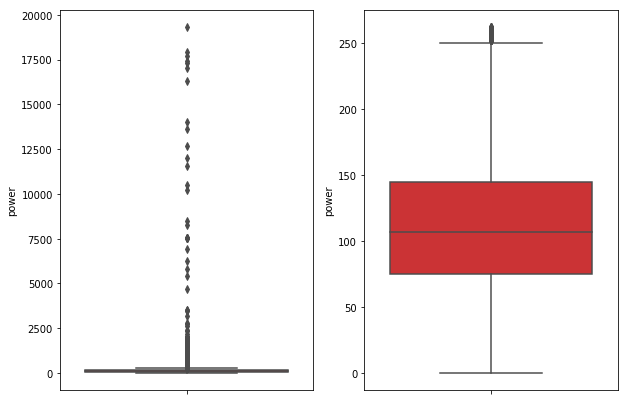

In [6]:
drop_outliers(train, 'power', scale=1.5)

从这张删除异常值前后的箱型图对比可以看出，剔除异常值后，数据的分布就很均匀了。

下面我们就批量对所有的特征进行一次异常数据删除：

feature SaleID deleted number is 0
feature name deleted number is 0
feature regDate deleted number is 0
feature model deleted number is 9720
feature brand deleted number is 4032
feature bodyType deleted number is 5458
feature fuelType deleted number is 333
feature gearbox deleted number is 26829
feature power deleted number is 1506
feature kilometer deleted number is 15306
feature regionCode deleted number is 4
feature seller deleted number is 1
feature offerType deleted number is 0
feature creatDate deleted number is 13989
feature price deleted number is 4527
feature v_0 deleted number is 2558
feature v_1 deleted number is 0
feature v_2 deleted number is 487
feature v_3 deleted number is 173
feature v_4 deleted number is 61
feature v_5 deleted number is 0
feature v_6 deleted number is 0
feature v_7 deleted number is 64
feature v_8 deleted number is 0
feature v_9 deleted number is 24
feature v_10 deleted number is 0
feature v_11 deleted number is 0
feature v_12 deleted number is 4
feat

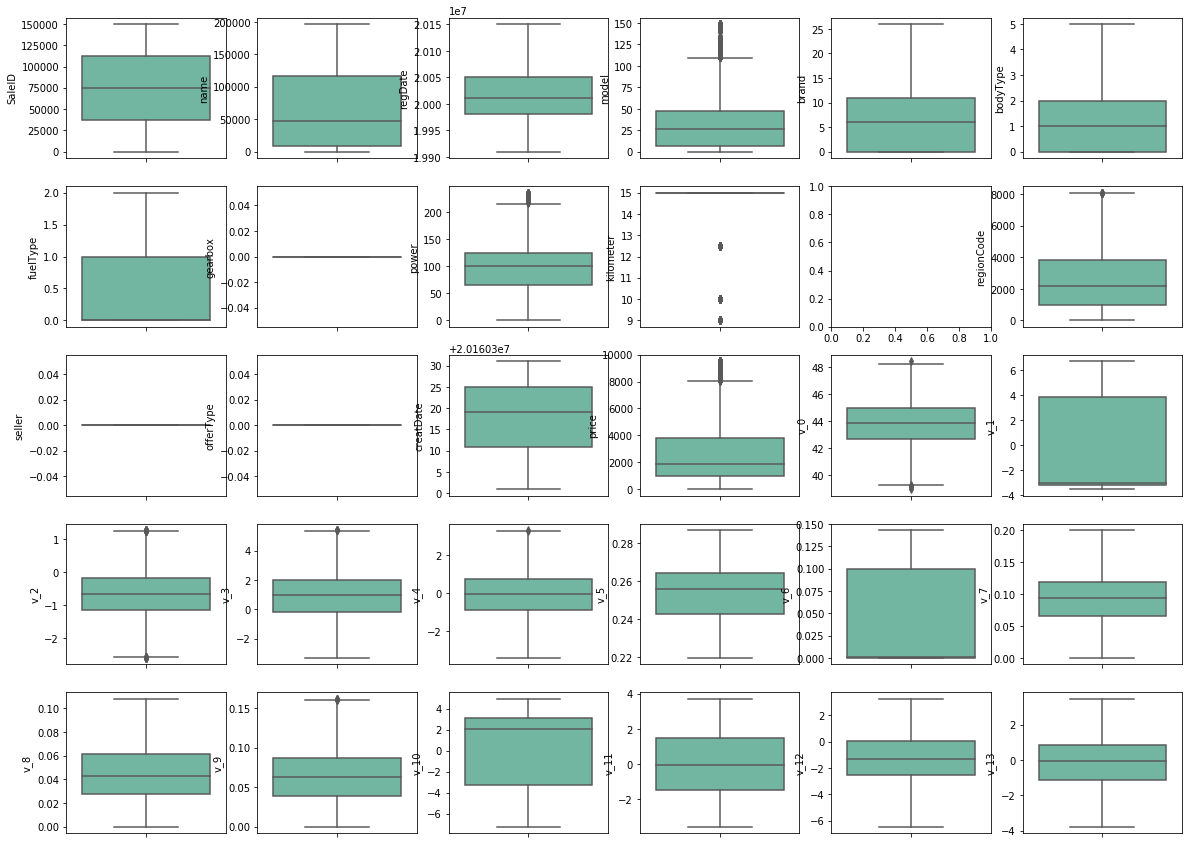

In [7]:
def Bach_drop_outliers(data,scale=1.5):
    dataNew = data.copy()

    for fea in data.columns:
        try:
            IQR = scale * (dataNew[fea].quantile(0.75) - dataNew[fea].quantile(0.25)) # quantile是pd内置的求四分位的函数
        except:
            continue
        val_low = dataNew[fea].quantile(0.25) - IQR # 下边缘
        val_up = dataNew[fea].quantile(0.75) + IQR # 上边缘
        rule_low = (dataNew[fea] < val_low) # 下边缘的极小异常值的下标列表
        rule_up = (dataNew[fea] > val_up)   # 上边缘的极大异常值的下标列表
        
        index = np.arange(dataNew[fea].shape[0])[rule_low | rule_up] # | 运算就是说只要rule_low和rule_up中只要有一个值为True，就把这个下标取出来
        print("feature %s deleted number is %d"%(fea, len(index)))
        
        dataNew = dataNew.drop(index)# 删除index对应下标的元素
        dataNew.reset_index(drop=True, inplace=True)
    fig, ax = plt.subplots(5, 6, figsize = (20, 15))
    x = 0
    y = 0
    for fea in dataNew.columns:
        try:
            sns.boxplot(y = dataNew[fea], data =dataNew, palette = "Set2", ax = ax[x][y])
            y+=1
            if y == 6:
                y = 0
                x += 1
        except:
            print(fea)
            y+=1
            if y == 6:
                y = 0
                x += 1
            continue
    return dataNew

train = Bach_drop_outliers(train)

可以看出，经过箱型图异常值删除后，新数据的箱型图的数据几乎没有异常值了，甚至有些箱型图的数据是一条直线，当然那是因为数据本身就是种类非0即1。

## 2️⃣ 树模型的特征构造
&emsp;&emsp;训练集和测试集放在一起，方便构造特征

In [9]:
train['train'] = 1
test['train'] = 0
data = pd.concat([train, test], ignore_index=True, sort=False)
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
1,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573,1
2,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567,1
3,10,18961,20050811,19.0,9,3.0,1.0,0.0,101,15.0,...,0.105385,0.077271,0.042445,0.060794,-4.206000,1.060391,-0.647515,-0.191194,0.349187,1
4,13,8129,20041110,65.0,1,0.0,0.0,0.0,150,15.0,...,0.106950,0.134945,0.050364,0.051359,-4.614692,0.821889,0.753490,-0.886425,-0.341562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112975,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695,0
112976,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073,0
112977,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420,0
112978,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353,0


### 2️⃣.1️⃣ 时间特征构造
- 使用时间：`data['creatDate']` - `data['regDate']`，反应汽车使用时间，一般来说价格与使用时间成反比
- 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'

In [10]:
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data['used_time']

0         4757.0
1         2482.0
2         6108.0
3         3874.0
4         4154.0
           ...  
112975    7261.0
112976    6014.0
112977    4345.0
112978       NaN
112979    4151.0
Name: used_time, Length: 112980, dtype: float64

- 看一下空数据，有 7.6k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
- 但是这里不建议删除，因为删除缺失数据占总样本量过大，3.8%
- 我们可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；

In [11]:
data['used_time'].isnull().sum()

8591

In [12]:
data.isnull().sum().sum()

70585

### 2️⃣.2️⃣ 城市信息特征提取
- 从邮编中提取城市信息，因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识

In [13]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data['city']

0         4
1         3
2         4
3         1
4         3
         ..
112975    3
112976    1
112977    3
112978    1
112979    3
Name: city, Length: 112980, dtype: object

### 2️⃣.2️⃣ 城市信息特征提取
&emsp;&emsp;计算某品牌的销售统计量，这里要以 train 的数据计算统计量。

In [14]:
train_gb = train.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0] # kind_data['price'] > 0 返回的是下标再取一次列表就得到了数据
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,train,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,1,4757.0,4,4940.0,9500.0,2999.0,149.0,17934852.0,2537.956443,3629.80
1,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,1,2482.0,3,3557.0,9500.0,2490.0,200.0,10936962.0,2180.881827,3073.91
2,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,1,6108.0,4,8784.0,9500.0,1350.0,13.0,17445064.0,1797.704405,1985.78
3,10,18961,20050811,19.0,9,3.0,1.0,0.0,101,15.0,...,1,3874.0,1,4487.0,9500.0,1250.0,55.0,7867901.0,1556.621159,1753.10
4,13,8129,20041110,65.0,1,0.0,0.0,0.0,150,15.0,...,1,4154.0,3,4940.0,9500.0,2999.0,149.0,17934852.0,2537.956443,3629.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112975,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0,7261.0,3,6368.0,9500.0,3000.0,150.0,24046576.0,2558.650243,3775.57
112976,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0,6014.0,1,16371.0,9500.0,2150.0,50.0,46735356.0,2276.755156,2854.59
112977,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0,4345.0,3,4940.0,9500.0,2999.0,149.0,17934852.0,2537.956443,3629.80
112978,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0,NaN,1,4940.0,9500.0,2999.0,149.0,17934852.0,2537.956443,3629.80


In [16]:
brand_fe

,brand,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,16371.0,9500.0,2150.0,50.0,46735356.0,2276.755156,2854.59
1,1,4940.0,9500.0,2999.0,149.0,17934852.0,2537.956443,3629.80
2,3,665.0,9500.0,2800.0,99.0,2158773.0,2058.532395,3241.40
3,4,6368.0,9500.0,3000.0,150.0,24046576.0,2558.650243,3775.57
4,5,2842.0,9500.0,1850.0,75.0,6562224.0,1738.415572,2308.20
5,6,5778.0,9500.0,1400.0,50.0,11955982.0,1871.933447,2068.87
6,7,1035.0,9500.0,1500.0,100.0,2372550.0,2071.320262,2290.11
7,8,705.0,9500.0,1100.0,125.0,1077211.0,1318.748474,1525.79
8,9,4487.0,9500.0,1250.0,55.0,7867901.0,1556.621159,1753.10
9,10,3557.0,9500.0,2490.0,200.0,10936962.0,2180.881827,3073.91


## 3️⃣ 树模型的数据分桶
&emsp;&emsp;数据分箱（也称为离散分箱或分段）是一种数据预处理技术，用于减少次要观察误差的影响，是一种将多个连续值分组为较少数量的“分箱”的方法。例如我们有各个年龄的数据的统计值，可以分成某个段的年龄的值。
1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量变成 M*N 个变量，进一步引入非线形，提升了表达能力；
5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

下面以`power`为例子，做一次数据分桶

In [17]:
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']]

,power_bin,power
0,NaN,0
1,10.0,109
2,10.0,101
3,10.0,101
4,14.0,150
...,...,...
112975,11.0,116
112976,7.0,75
112977,22.0,224
112978,NaN,334


可以看出这个分箱的作用就是将同一个区间段的功率值设为同样的值，比如101~109都设置为10.0。
然后就可以删除掉原数据了：

In [18]:
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [19]:
print(data.shape)
data.columns

(112980, 39)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time',
       'city', 'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

至此，可以导出给树模型用的数据

In [20]:
data.to_csv('data_for_tree.csv', index=0)

## 4️⃣ LR与NN模型的特征构造
&emsp;&emsp;上面的步骤就是一次比较完备的特征构造，我们还可以为其他模型构造特征，主要是由于不用模型需要的数据输入是不同的。

### 4️⃣.1️⃣ $log$与归一化
观察一下数据分布

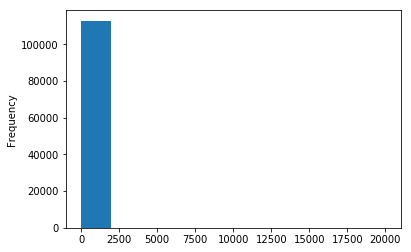

In [21]:
data['power'].plot.hist()

再看看`train`数据集的分布：

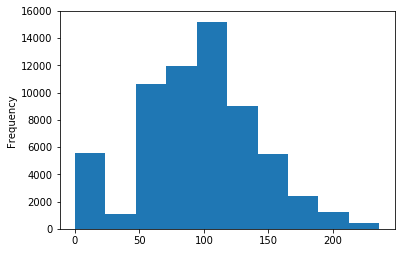

In [22]:
train['power'].plot.hist()

我们对其取 log，再做归一化

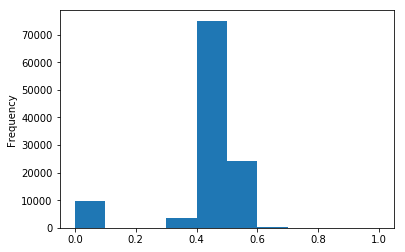

In [23]:
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

看看行驶里程的情况，应该是原始数据已经分好了桶

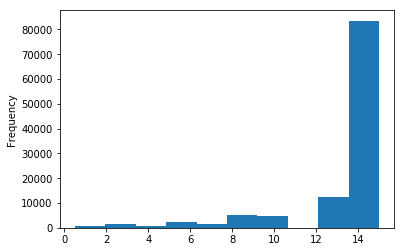

In [24]:
data['kilometer'].plot.hist()

归一化

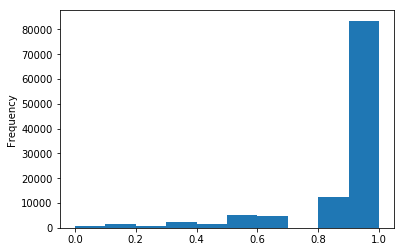

In [25]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

对刚刚构造的统计量进行归一化

In [30]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data.columns[-10:]

Index(['used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'power_bin'],
      dtype='object')

In [47]:
for i in data.columns[-10:]:
    if np.min(data[i]) != '': # 存在空值的情况
        data[i] = max_min(data[i])

### 4️⃣.2️⃣ $OneEncoder$编码
&emsp;&emsp;对类别特征进行$OneEncoder$<br>
在此之前先介绍一下$OneEncoder$编码:$one-hot$的基本思想，将离散型特征的每一种取值都看成一种状态，若你的这一特征中有$N$个不相同的取值，那么我们就可以将该特征抽象成$N$种不同的状态，$one-hot$编码保证了每一个取值只会使得一种状态处于“激活态”，也就是说这N种状态中只有一个状态位值为1，其他状态位都是0。举个例子，假设我们以学历为例，我们想要研究的类别为小学、中学、大学、硕士、博士五种类别，我们使用$one-hot$对其编码就会得到：

![](../img/onehot.jpg)

- $dummy \quad encoding$

哑变量编码直观的解释就是任意的将一个状态位去除。还是拿上面的例子来说，我们用4个状态位就足够反应上述5个类别的信息，也就是我们仅仅使用前四个状态位 [0,0,0,0] 就可以表达博士了。只是因为对于一个我们研究的样本，他已不是小学生、也不是中学生、也不是大学生、又不是研究生，那么我们就可以默认他是博士，是不是。所以，我们用哑变量编码可以将上述5类表示成：

![](../img/onehot1.jpg)


In [48]:
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])
data

,SaleID,name,power,kilometer,seller,offerType,price,v_0,v_1,v_2,...,power_bin_0.6896551724137931,power_bin_0.7241379310344828,power_bin_0.7586206896551724,power_bin_0.7931034482758621,power_bin_0.8275862068965517,power_bin_0.8620689655172413,power_bin_0.896551724137931,power_bin_0.9310344827586207,power_bin_0.9655172413793104,power_bin_1.0
0,1,2262,0.000000,1.000000,0,0,3600.0,45.305273,5.236112,0.137925,...,0,0,0,0,0,0,0,0,0,0
1,5,137642,0.474626,0.655172,0,0,8000.0,46.323165,-3.229285,0.156615,...,0,0,0,0,0,0,0,0,0,0
2,7,165346,0.467002,1.000000,0,0,1000.0,42.255586,-3.167771,-0.676693,...,0,0,0,0,0,0,0,0,0,0
3,10,18961,0.467002,1.000000,0,0,3100.0,45.401241,4.195311,-0.370513,...,0,0,0,0,0,0,0,0,0,0
4,13,8129,0.506615,1.000000,0,0,3100.0,46.844574,4.175332,0.490609,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112975,199995,20903,0.480856,1.000000,0,0,NaN,45.621391,5.958453,-0.918571,...,0,0,0,0,0,0,0,0,0,0
112976,199996,708,0.437292,1.000000,0,0,NaN,43.935162,4.476841,-0.841710,...,0,0,0,0,0,0,0,0,0,0
112977,199997,6693,0.546885,1.000000,0,0,NaN,46.537137,4.170806,0.388595,...,0,0,1,0,0,0,0,0,0,0
112978,199998,96900,0.587076,1.000000,0,0,NaN,46.771359,-3.296814,0.243566,...,0,0,0,0,0,0,0,0,0,0


- 将这份数据输出给LR模型使用

In [49]:
data.to_csv('data_for_lr.csv', index=0)

## 5️⃣ 特征选择
### 5️⃣.1️⃣ 过滤式(filter)
相关性分析

In [50]:
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.4698539569820024
-0.19974282513118508
0.04085800320025127
0.3135239590412946
0.07894119089254827
0.3138873049004745


可以看出`power`，`brand_price_average`，`brand_price_median`与`price`相关性比较高

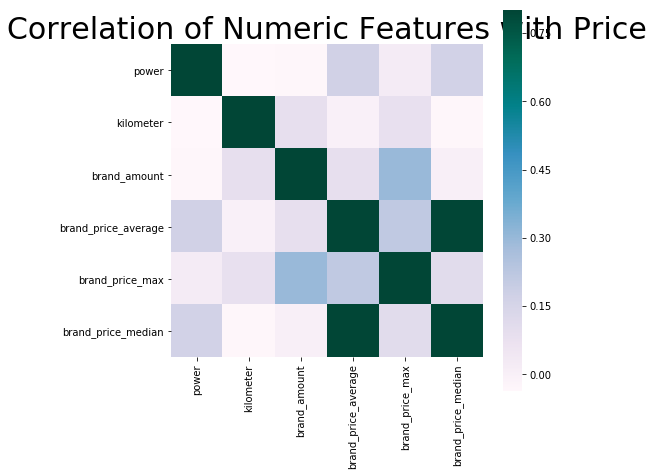

In [64]:
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 
                     'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=30)
sns.heatmap(correlation, square = True, cmap = 'PuBuGn', vmax=0.8)

看不出来啥。😛

### 5️⃣.2️⃣ 包裹式(wrapper)

In [65]:
!pip install mlxtend

In [106]:
x

,SaleID,name,power,kilometer,seller,offerType,v_0,v_1,v_2,v_3,...,power_bin_0.6896551724137931,power_bin_0.7241379310344828,power_bin_0.7586206896551724,power_bin_0.7931034482758621,power_bin_0.8275862068965517,power_bin_0.8620689655172413,power_bin_0.896551724137931,power_bin_0.9310344827586207,power_bin_0.9655172413793104,power_bin_1.0
0,1,2262,0.000000,1.000000,0,0,45.305273,5.236112,0.137925,1.380657,...,0,0,0,0,0,0,0,0,0,0
1,5,137642,0.474626,0.655172,0,0,46.323165,-3.229285,0.156615,-1.727217,...,0,0,0,0,0,0,0,0,0,0
2,7,165346,0.467002,1.000000,0,0,42.255586,-3.167771,-0.676693,1.942673,...,0,0,0,0,0,0,0,0,0,0
3,10,18961,0.467002,1.000000,0,0,45.401241,4.195311,-0.370513,0.444251,...,0,0,0,0,0,0,0,0,0,0
4,13,8129,0.506615,1.000000,0,0,46.844574,4.175332,0.490609,0.085718,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112975,199995,20903,0.480856,1.000000,0,0,45.621391,5.958453,-0.918571,0.774826,...,0,0,0,0,0,0,0,0,0,0
112976,199996,708,0.437292,1.000000,0,0,43.935162,4.476841,-0.841710,1.328253,...,0,0,0,0,0,0,0,0,0,0
112977,199997,6693,0.546885,1.000000,0,0,46.537137,4.170806,0.388595,-0.704689,...,0,0,1,0,0,0,0,0,0,0
112978,199998,96900,0.587076,1.000000,0,0,46.771359,-3.296814,0.243566,-1.277411,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
x.dropna(axis=0, how='any', inplace=True)
y.dropna(axis=0, how='any', inplace=True)
sfs.fit(x, y)
sfs.k_feature_names_ 

画出来，可以看到边际效益

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

### 5️⃣.3️⃣ 嵌入式（embedding）
Lasso 回归和决策树可以完成嵌入式特征选择，大部分情况下都是用嵌入式做特征筛选。

下一步就是建模了。🤔